# Example TrOCR
Colab 환경에서 TrOCR 모델을 사용해 손글씨를 인식해보는 예제입니다.

## Colab 환경 설정
예제를 실행시키기 위해 python package들을 설치합니다. 예제로 사용할 이미지들도 다운로드 받습니다.

In [9]:
using_colab = True

In [2]:
if using_colab:
    !wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements.txt
    !pip install -r requirements.txt

    # Download examples
    !mkdir examples
    !cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Red.png
    !cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png

## Import dependency

In [3]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

## Initialize Model

huggingface의 transformers에 구현되어 있는 TrOCR 모델을 불러옵니다. transfomers 라이브러리에서 pre-train 된 TrOCR 모델을 제공합니다.

transfomers의 라이브러리에서 두 가지 class를 불러옵니다.
- TrOCRProcessor: 모델에 입력할 데이터의 전처리와 출력된 모델 결과물의 후처리를 수행합니다.
- VisionEncoderDecoderModel: 실제 모델이며 전처리된 입력을 받으면 결과물을 출력합니다.

In [4]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[INFO] Load pretrained VisionEncoderDecoderModel


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Inference Model

TrOCRProcessor와 VisionEncoderDecoderModel의 내부 함수를 이용해 전처리, 추론, 후처리를 수행하여 원하는 결과물을 얻습니다.

### 예제 이미지 불러오기

In [5]:
# load image from the IAM database
image = Image.open("examples/Red.png").convert("RGB")

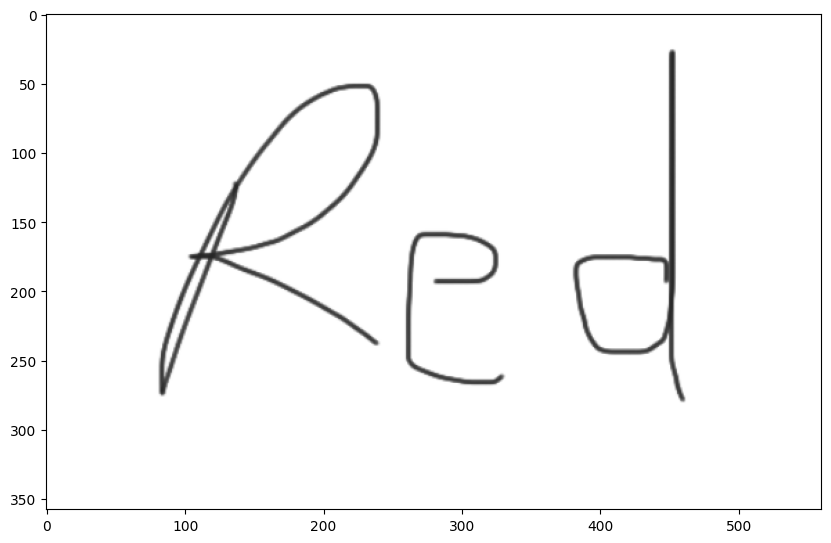

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

### TrOCR 모델 추론

In [7]:
print("[INFO] Preprocess")
pixel_values = processor(images=image, return_tensors="pt").pixel_values
print("[INFO] Inference")
token_ids = model.generate(pixel_values)
print("[INFO] Postprocess")
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

[INFO] Preprocess
[INFO] Inference
[INFO] Postprocess


/home/hpds/.conda/envs/dl_apps/lib/python3.9/site-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [8]:
text_from_image

'Red'